In [1]:
import os
import pickle

def load_pkl_files(root_dir):
    data = {}
    for root, dirs, files in os.walk(root_dir):
        for file in files:
            if file.endswith('.txt'):
                file_path = os.path.join(root, file)
                try:
                    with open(file_path, 'rb') as f:
                        data[file] = pickle.load(f)
                    print(f"Loaded: {file}")
                except Exception as e:
                    print(f"Error loading {file}: {str(e)}")
    return data

# Usage
root_directory = '/teamspace/studios/this_studio/fdl_project/training_files'  # Adjust this to the actual path of your root directory
loaded_data = load_pkl_files(root_directory)

# You can now access the loaded data using the filename as the key
# For example: loaded_data['loss_model_from_scratch_LSTM_CNN.txt']

Loaded: loss_model_from_scratch_transformer_2xsmall_20240702_124038.txt
Loaded: loss_model_from_scratch_transformer_small_20240629_135003.txt
Loaded: loss_model_from_scratch_transformer_2xsmall_20240702_124038.txt
Loaded: loss_model_transformer_efficientnet_20240630_083752.txt
Loaded: loss_leaky_relu_model_from_scratch_transformer_small_20240702_090159.txt
Loaded: loss_model_from_scratch_LSTM_CNN.txt
Loaded: loss_model_transformer_based_custom_2X_CNN_2X_num_heads_leaky_relu.txt
Loaded: loss_model_transformer_based_custom_CNN_2X_num_heads.txt
Loaded: loss_plus_2_conv_layers_model_from_scratch_transformer_small.txt


In [2]:
loaded_data.keys()

dict_keys(['loss_model_from_scratch_transformer_2xsmall_20240702_124038.txt', 'loss_model_from_scratch_transformer_small_20240629_135003.txt', 'loss_model_transformer_efficientnet_20240630_083752.txt', 'loss_leaky_relu_model_from_scratch_transformer_small_20240702_090159.txt', 'loss_model_from_scratch_LSTM_CNN.txt', 'loss_model_transformer_based_custom_2X_CNN_2X_num_heads_leaky_relu.txt', 'loss_model_transformer_based_custom_CNN_2X_num_heads.txt', 'loss_plus_2_conv_layers_model_from_scratch_transformer_small.txt'])

In [40]:
loaded_data["loss_model_from_scratch_transformer_2xsmall_20240702_124038.txt"].keys()



dict_keys(['loss', 'val_loss'])

In [4]:
len(loaded_data["loss_model_from_scratch_transformer_2xsmall_20240702_124038.txt"]['val_loss'])

14

In [6]:
!pip install seaborn

In [42]:
def add_transformer_data(processed_data):
    # Training loss for each epoch
    train_loss = [
        26.4177, 18.1230, 16.7565, 16.1261, 15.7328,
        15.4555, 15.2424, 15.0648, 14.9216, 14.8001,
        14.6924, 14.6001, 14.5194, 14.4451, 14.3730
    ]

    # Validation loss for each epoch
    val_loss = [
        18.9095, 16.5627, 15.7010, 15.2619, 14.9526,
        14.7098, 14.5707, 14.4439, 14.3280, 14.2839,
        14.1771, 14.1186, 14.0759, 14.0370, 13.9771
    ]

    # Add the new entry to the processed_data dictionary
    processed_data["Transformer Half Embedding Size"] = {
        'train_loss': train_loss,
        'val_loss': val_loss
    }

    return processed_data


Loaded: loss_model_from_scratch_transformer_2xsmall_20240702_124038.txt
Loaded: loss_model_from_scratch_transformer_small_20240629_135003.txt
Loaded: loss_model_from_scratch_transformer_2xsmall_20240702_124038.txt
Loaded: loss_model_transformer_efficientnet_20240630_083752.txt
Loaded: loss_leaky_relu_model_from_scratch_transformer_small_20240702_090159.txt
Loaded: loss_model_from_scratch_LSTM_CNN.txt
Loaded: loss_model_transformer_based_custom_2X_CNN_2X_num_heads_leaky_relu.txt
Loaded: loss_model_transformer_based_custom_CNN_2X_num_heads.txt
Loaded: loss_plus_2_conv_layers_model_from_scratch_transformer_small.txt
Loaded: loss_model_transformer_based_custom_DATAAUG_2X_CNN_2X_num_heads_leaky_relu_20240707_084329.txt
Loaded: loss_model_from_scratch_LSTM+Efficientnet_20240630_085004.txt
Loaded: loss_model_transformer_efficientnetB7_20240708_203425.txt

Processed files with expressive titles:
- Model   Transformer Double CNN Filters
- Model   Transformer
- Model Transformer EfficientNet
- L

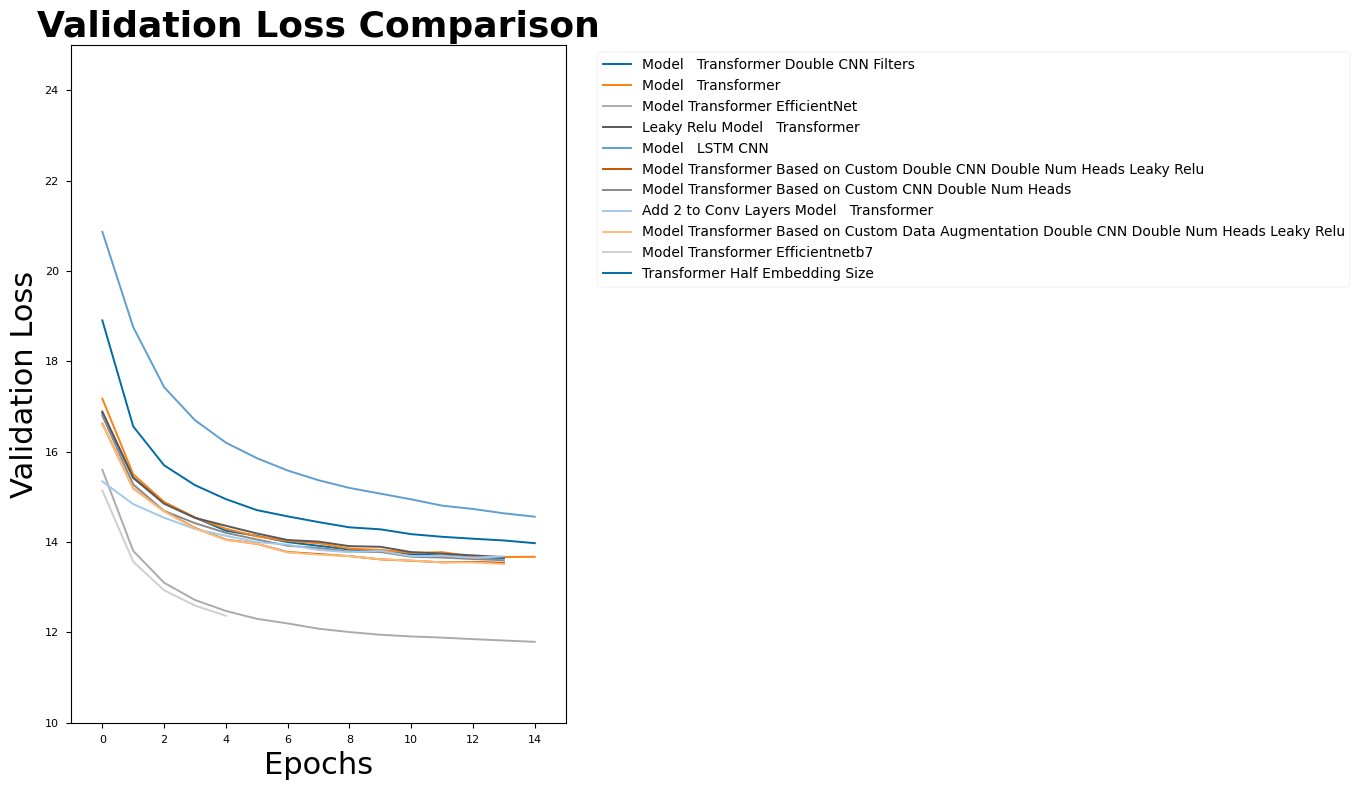


Statistics for Model   Transformer Double CNN Filters:
Final training loss: 13.4995
Final validation loss: 13.6487
Best validation loss: 13.6487
Epoch with best validation loss: 14

Statistics for Model   Transformer:
Final training loss: 13.0126
Final validation loss: 13.5818
Best validation loss: 13.5582
Epoch with best validation loss: 23

Statistics for Model Transformer EfficientNet:
Final training loss: 11.5146
Final validation loss: 11.7924
Best validation loss: 11.7924
Epoch with best validation loss: 15

Statistics for Leaky Relu Model   Transformer:
Final training loss: 13.5435
Final validation loss: 13.6672
Best validation loss: 13.6672
Epoch with best validation loss: 14

Statistics for Model   LSTM CNN:
Final training loss: 13.2517
Final validation loss: 14.1733
Best validation loss: 14.1733
Epoch with best validation loss: 27

Statistics for Model Transformer Based on Custom Double CNN Double Num Heads Leaky Relu:
Final training loss: 13.0637
Final validation loss: 13.54

In [141]:
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt

def load_pkl_files(root_dir):
    data = {}
    for root, dirs, files in os.walk(root_dir):
        for file in files:
            if file.endswith('.txt'):
                file_path = os.path.join(root, file)
                try:
                    with open(file_path, 'rb') as f:
                        data[file] = pickle.load(f)
                    print(f"Loaded: {file}")
                except Exception as e:
                    print(f"Error loading {file}: {str(e)}")
    return data

def generate_expressive_title(filename):
    # Remove the 'loss_' prefix and '.txt' suffix
    title = filename.replace('loss_', '').replace('.txt', '')
    
    # Split the title into parts
    parts = title.split('_')
    
    # Create a mapping for abbreviations and terms
    term_mapping = {
        'LSTM': 'LSTM',
        'CNN': 'CNN',
        '2X': 'Double',
        '2xsmall': 'Double CNN Filters',
        'leaky_relu': 'Leaky ReLU',
        'efficientnet': 'EfficientNet',
        'plus': 'Add 2 to',
        'DATAAUG': 'Data Augmentation',
        'from': '',
        'scratch' : '',
        'Small': '', # Remove 'Small', we used as default
        'small': '', # Remove 'small', we used as default
    }
    
    # Process each part
    processed_parts = []
    for part in parts:
        if part in term_mapping:
            processed_parts.append(term_mapping[part])
        elif not part.isdigit():  # Skip numeric parts
            processed_parts.append(part.capitalize())
    
    # Join the processed parts
    expressive_title = ' '.join(processed_parts)
    
    # Some final touch-ups
    expressive_title = expressive_title.replace('From Scratch', '(From Scratch)')
    expressive_title = expressive_title.replace('Based', 'Based on')
    
    return expressive_title.strip()

def process_losses(data):
    processed_data = {}
    for filename, content in data.items():
        train_loss = content['loss']
        val_loss = content['val_loss']
        
        if len(val_loss) == 0:
            print(f"Warning: No validation loss data for {filename}")
            continue
        
        # Determine the number of steps per epoch
        steps_per_epoch = len(train_loss) // len(val_loss)
        
        if steps_per_epoch == 0:
            print(f"Warning: More validation steps than training steps for {filename}")
            continue
        
        # Truncate the train_loss array to ensure it's divisible by steps_per_epoch
        truncated_length = (len(train_loss) // steps_per_epoch) * steps_per_epoch
        train_loss = train_loss[:truncated_length]
        
        # Average the training loss for each epoch
        train_loss_per_epoch = np.mean(np.array(train_loss).reshape(-1, steps_per_epoch), axis=1)
        
        # Ensure train_loss_per_epoch and val_loss have the same length
        # min_length = min(len(train_loss_per_epoch), len(val_loss))
        # train_loss_per_epoch = train_loss_per_epoch[:min_length]
        # val_loss = val_loss[:min_length]
        
        # Generate expressive title and use it as the new key
        expressive_title = generate_expressive_title(filename)
        processed_data[expressive_title] = {
            'train_loss': train_loss_per_epoch,
            'val_loss': val_loss
        }
    return processed_data

def plot_losses(data):
    plt.style.use('tableau-colorblind10') 
    for title, content in data.items():
        plt.figure(figsize=(16, 9))  # Increase figure size
        plt.plot(content['train_loss'], label='Training Loss', linewidth=2)
        plt.plot(content['val_loss'], label='Validation Loss', linewidth=2)
        plt.title(title, fontsize=26, fontweight='bold')  # Increase title font size
        plt.xlabel('Epochs', fontsize=22)  # Increase label font size
        plt.ylabel('Loss', fontsize=22)
        plt.legend(fontsize=16)  # Increase legend font size
        plt.ylim(10, 35)
        plt.xlim(0, 14)
        plt.tick_params(axis='both', which='major', labelsize=14)  # Increase tick label size
        plt.grid(True, linestyle='--', alpha=0.7)  # Add grid for better readability
        plt.tight_layout()
        plt.show()

def compare_models(data, trim_epochs=True , title='Validation Loss Comparison', xlabel='Epochs', ylabel='Validation Loss', legend_fontsize=10, zoom=False):
    plt.figure(figsize=(14, 8))
    # Available styles: ['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 
    # 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette',
    # 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']

    # seaborn-v0_8-bright  'seaborn-v0_8', 'seaborn-v0_8-bright', 
    plt.style.use('seaborn-v0_8-paper')
    for title, content in data.items():
        if trim_epochs:
            plt.plot(content['val_loss'][:15], label=title)
        else:
            plt.plot(content['val_loss'], label=title)
    plt.title('Validation Loss Comparison', fontsize=26, fontweight='bold')
    plt.xlabel(xlabel, fontsize=22)
    plt.ylabel(ylabel, fontsize=22)
    # plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    # plt.legend(bbox_to_anchor=(0.5, 1), loc='upper left', fontsize=14)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=legend_fontsize)
    if zoom:
            plt.xlim(12, 13)
            plt.ylim(13, 14.5)
    else:
        plt.ylim(10, 25)
        plt.xlim(-1, 15)
    plt.tight_layout()
    plt.show()

def print_statistics(data):
    for title, content in data.items():
        train_loss = content['train_loss']
        val_loss = content['val_loss']
        print(f"\nStatistics for {title}:")
        print(f"Final training loss: {train_loss[-1]:.4f}")
        print(f"Final validation loss: {val_loss[-1]:.4f}")
        print(f"Best validation loss: {min(val_loss):.4f}")
        print(f"Epoch with best validation loss: {np.argmin(val_loss) + 1}")

# Main execution
root_directory = '/teamspace/studios/this_studio/fdl_project/training_files'  # Adjust this to the actual path of your root directory
loaded_data = load_pkl_files(root_directory)

# Process the data to align training and validation losses
processed_data = process_losses(loaded_data)

# Print the keys (new expressive titles) of the processed data
print("\nProcessed files with expressive titles:")
for key in processed_data.keys():
    print(f"- {key}")

processed_data = add_transformer_data(processed_data)

# Plot the losses for each file
# plot_losses(processed_data)

# Compare models
compare_models(processed_data)


# Print statistics
print_statistics(processed_data)

In [122]:
# Compare models
processed_data.keys()

dict_keys(['Model   Transformer Double CNN Filters', 'Model   Transformer', 'Model Transformer EfficientNet', 'Leaky Relu Model   Transformer', 'Model   LSTM CNN', 'Model Transformer Based on Custom Double CNN Double Num Heads Leaky Relu', 'Model Transformer Based on Custom CNN Double Num Heads', 'Add 2 to Conv Layers Model   Transformer', 'Model Transformer Based on Custom Data Augmentation Double CNN Double Num Heads Leaky Relu', 'Model Transformer Efficientnetb7', 'Transformer Half Embedding Size'])

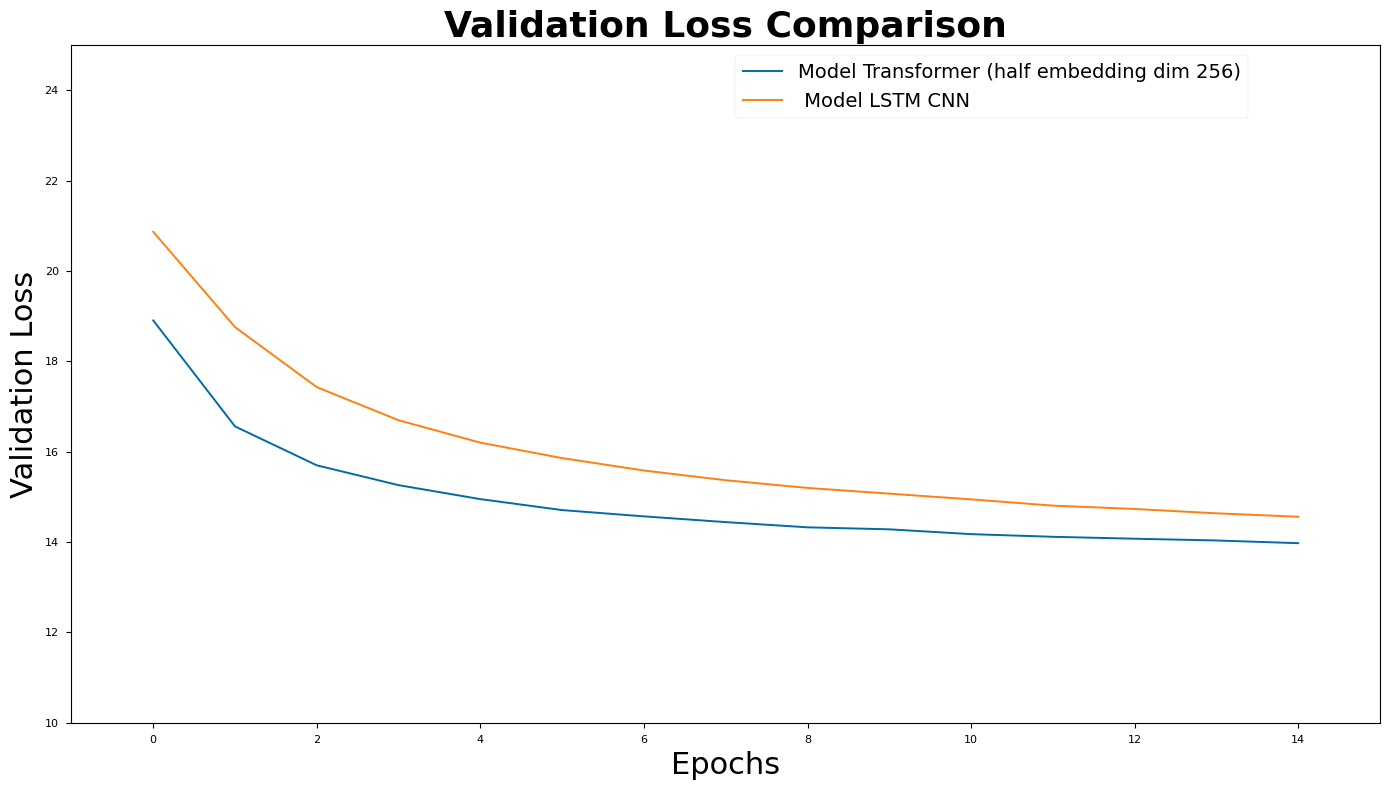

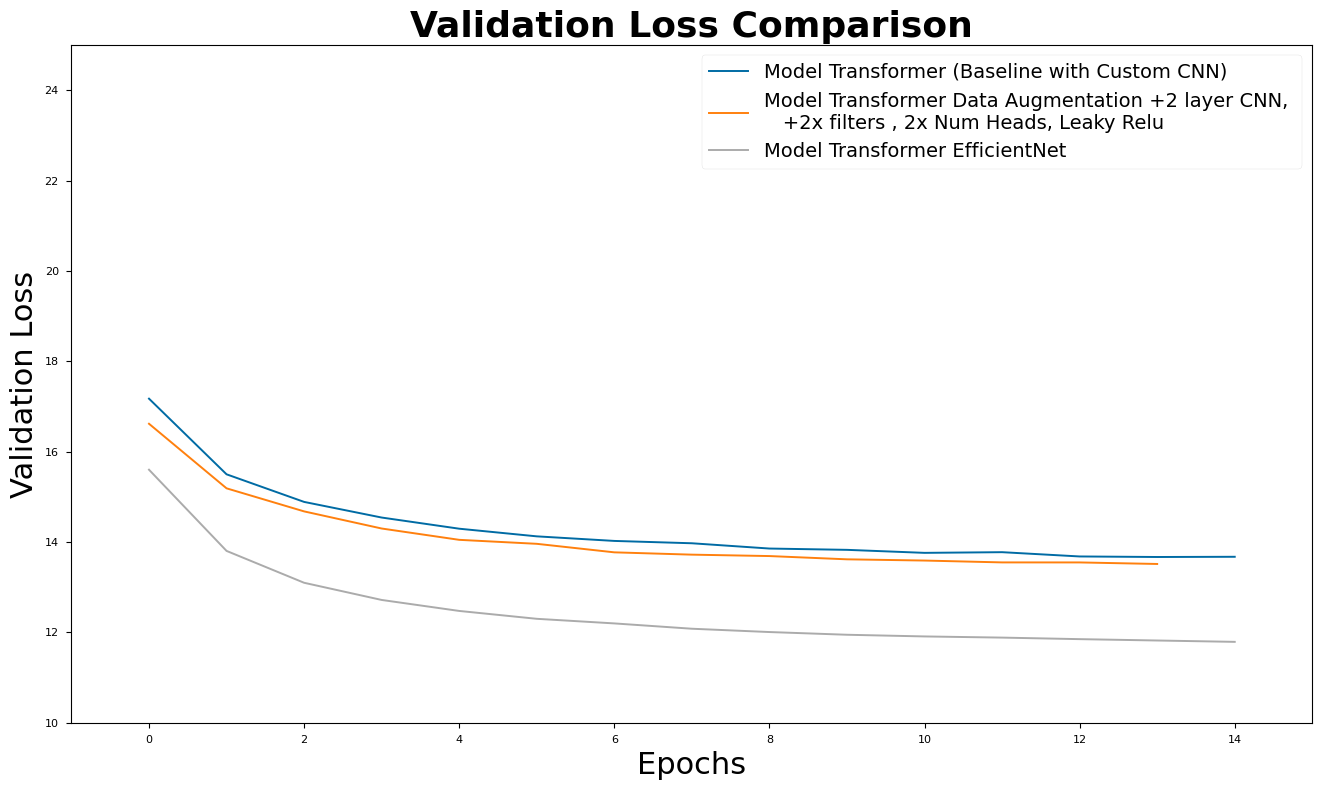

In [140]:
#dict_keys(
    # ['Model (From Scratch) Transformer Double CNN Filters', 'Model (From Scratch) Transformer', 'Model Transformer EfficientNet',
    # 'Leaky Relu Model (From Scratch) Transformer', 'Model (From Scratch) LSTM CNN', 'Model Transformer Based on Custom Double CNN Double Num Heads Leaky Relu',
    # 'Model Transformer Based on Custom CNN Double Num Heads', 'Add 2 to Conv Layers Model (From Scratch) Transformer', 'Model Transformer Efficientnetb7'])

Transformer_vs_LSTM = { 
    'Model Transformer (half embedding dim 256)': processed_data['Transformer Half Embedding Size'],
    ' Model LSTM CNN': processed_data['Model   LSTM CNN']
}
# Compare models
compare_models(Transformer_vs_LSTM)


transformer_variations = {
    'Model Transformer (half embedding dim 256)': processed_data['Transformer Half Embedding Size'],
    'Model Transformer': processed_data['Model   Transformer'],    
    'Model Transformer Leaky Relu Model': processed_data['Leaky Relu Model   Transformer'],
    'Model Transformer +2 layer CNN, +2x filters , 2x Num Heads, Leaky Relu': processed_data['Model Transformer Based on Custom Double CNN Double Num Heads Leaky Relu'],
    'Model Transformer Based on Custom CNN Double Num Heads': processed_data['Model Transformer Based on Custom CNN Double Num Heads'],
    'Model Transformer Add 2 to Conv Layers ': processed_data['Add 2 to Conv Layers Model   Transformer'],
    'Model Transformer Double Num Heads': processed_data['Model Transformer Based on Custom CNN Double Num Heads'],
    'Model Transformer Data Augmentation +2 layer CNN, \n   +2x filters , 2x Num Heads, Leaky Relu': processed_data['Model Transformer Based on Custom Data Augmentation Double CNN Double Num Heads Leaky Relu'],
}

# compare_models(transformer_variations)
# compare_models(transformer_variations, zoom=True)



#transformer cnn ( baseline ) vs efficientnet
transformer_CNN_vs_efficientnet = {
    'Model Transformer (Baseline with Custom CNN)': processed_data['Model   Transformer'],
    'Model Transformer EfficientNet': processed_data['Model Transformer EfficientNet']
}

# compare_models(transformer_CNN_vs_efficientnet)

# all updated models vs data augmentation
Normal_vs_data_augmentation = {
    'Model Transformer (Baseline with Custom CNN)': processed_data['Model   Transformer'],
    'Model Transformer Data Augmentation +2 layer CNN, \n   +2x filters , 2x Num Heads, Leaky Relu': processed_data['Model Transformer Based on Custom Data Augmentation Double CNN Double Num Heads Leaky Relu'],
    'Model Transformer EfficientNet': processed_data['Model Transformer EfficientNet']}
compare_models(Normal_vs_data_augmentation)


In [103]:
!pip install tabulate


In [124]:
from tabulate import tabulate

def print_validation_loss_table(data, epoch=14):
    # The epoch is set to 14 by default (in reality it will be epoch - 1 as the first epoch is 0)
    headers = ['Model', f'Epoch (Trimmed at: {epoch})', 'Validation Loss']
    table = []
    
    for title, content in data.items():
        val_loss = content['val_loss']
        if epoch <= len(val_loss):
            table.append([title, epoch, round(val_loss[epoch - 1], 4)])
        else:
            last_epoch = len(val_loss)
            table.append([title, last_epoch, round(val_loss[-1], 4)])  # Use the score at the last epoch
    
    # Sort the table by Validation Loss
    table.sort(key=lambda x: x[2])

    print(tabulate(table, headers=headers, tablefmt='grid'))

# Use the function to print the validation loss table for a specific epoch (default is 14)
print_validation_loss_table(processed_data)


+--------------------------------------------------------------------------------------------+--------------------------+-------------------+
| Model                                                                                      |   Epoch (Trimmed at: 14) |   Validation Loss |
+============================================================================================+==========================+===================+
| Model Transformer EfficientNet                                                             |                       14 |           11.8223 |
+--------------------------------------------------------------------------------------------+--------------------------+-------------------+
| Model Transformer Efficientnetb7                                                           |                        5 |           12.3706 |
+--------------------------------------------------------------------------------------------+--------------------------+-------------------+
| Mode

In [136]:
from tabulate import tabulate

def print_validation_loss_table(data, epoch=14, baseline_model="Model   Transformer"):
    headers = ['Model', f'Epoch (Trimmed at: {epoch})', 'Validation Loss', '% Improvement']
    table = []
    
    baseline_loss = None
    for title, content in data.items():
        if baseline_model.lower().replace(" ", "") == title.lower().replace(" ", ""):
            baseline_loss = content['val_loss'][min(epoch - 1, len(content['val_loss']) - 1)]
            break
    
    if baseline_loss is None:
        print(f"Error: Baseline model '{baseline_model}' not found in the data.")
        return
    
    for title, content in data.items():
        val_loss = content['val_loss']
        if epoch <= len(val_loss):
            current_loss = val_loss[epoch - 1]
            epoch_used = epoch
        else:
            current_loss = val_loss[-1]
            epoch_used = len(val_loss)
        
        improvement = (baseline_loss - current_loss) / baseline_loss * 100
        
        table.append([
            title,
            epoch_used,
            round(current_loss, 4),
            f"{improvement:.2f}%"
        ])
    
    # Sort the table by Validation Loss
    table.sort(key=lambda x: x[2])

    print(tabulate(table, headers=headers, tablefmt='grid'))

# Use the function to print the validation loss table for a specific epoch (default is 14)
print_validation_loss_table(processed_data, baseline_model="Model Transformer")

+--------------------------------------------------------------------------------------------+--------------------------+-------------------+-----------------+
| Model                                                                                      |   Epoch (Trimmed at: 14) |   Validation Loss | % Improvement   |
+============================================================================================+==========================+===================+=================+
| Model Transformer EfficientNet                                                             |                       14 |           11.8223 | 13.52%          |
+--------------------------------------------------------------------------------------------+--------------------------+-------------------+-----------------+
| Model Transformer Efficientnetb7                                                           |                        5 |           12.3706 | 9.51%           |
+---------------------------------------

In [10]:
import matplotlib.pyplot as plt

def plot_losses(data):
    print("Available styles:", plt.style.available)  # Print available styles
    plt.style.use('ggplot')  # Use 'ggplot' style which is usually available
    for title, content in data.items():
        plt.figure(figsize=(16, 9))  # Increase figure size
        plt.plot(content['train_loss'], label='Training Loss', linewidth=2)
        plt.plot(content['val_loss'], label='Validation Loss', linewidth=2)
        plt.title(title, fontsize=24, fontweight='bold')  # Increase title font size
        plt.xlabel('Epochs', fontsize=20)  # Increase label font size
        plt.ylabel('Loss', fontsize=20)
        plt.legend(fontsize=16)  # Increase legend font size
        plt.tick_params(axis='both', which='major', labelsize=14)  # Increase tick label size
        plt.grid(True, linestyle='--', alpha=0.7)  # Add grid for better readability
        plt.tight_layout()
        plt.show()

# Example data to demonstrate the plot function
example_data = {
    'Model A': {
        'train_loss': [0.5, 0.4, 0.3, 0.25, 0.2],
        'val_loss': [0.55, 0.45, 0.35, 0.3, 0.25]
    },
    'Model B': {
        'train_loss': [0.6, 0.5, 0.4, 0.35, 0.3],
        'val_loss': [0.65, 0.55, 0.45, 0.4, 0.35]
    }
}

# Call the function to plot the example data
# plot_losses(example_data)


In [11]:
# import matplotlib.pyplot as plt

# def plot_losses_with_styles(data):
#     styles = plt.style.available
#     for style in styles:
#         plt.style.use(style)
#         for title, content in data.items():
#             plt.figure(figsize=(16, 9))
#             plt.plot(content['train_loss'], label='Training Loss', linewidth=2)
#             plt.plot(content['val_loss'], label='Validation Loss', linewidth=2)
#             plt.title(f"{title} - Style: {style}", fontsize=24, fontweight='bold')
#             plt.xlabel('Epochs', fontsize=20)
#             plt.ylabel('Loss', fontsize=20)
#             plt.legend(fontsize=16)
#             plt.tick_params(axis='both', which='major', labelsize=14)
#             plt.grid(True, linestyle='--', alpha=0.7)
#             plt.tight_layout()
#             plt.show()

# # Example data to demonstrate the plot function
# example_data = {
#     'Model A': {
#         'train_loss': [0.5, 0.4, 0.3, 0.25, 0.2],
#         'val_loss': [0.55, 0.45, 0.35, 0.3, 0.25]
#     },
#     'Model B': {
#         'train_loss': [0.6, 0.5, 0.4, 0.35, 0.3],
#         'val_loss': [0.65, 0.55, 0.45, 0.4, 0.35]
#     }
# }

# # Call the function to plot the example data with different styles
# plot_losses_with_styles(example_data)
